# Problem Statement 8

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting dataset

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Heatmap of correlation values

<AxesSubplot:>

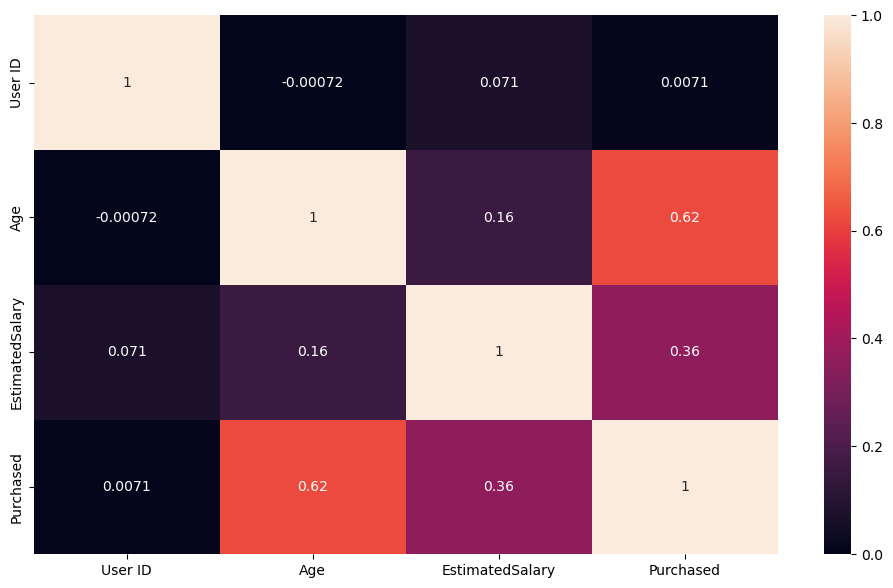

In [6]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)

### Defining columns on which model to be trained

In [7]:
y = df['Purchased']

In [8]:
X = df[['Age', 'EstimatedSalary']]

In [9]:
from sklearn.model_selection import train_test_split

### Split dataset into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression

### Training model

In [16]:
lm = LogisticRegression()

In [17]:
lm.fit(X_train, y_train)

LogisticRegression()

In [18]:
pred = lm.predict(X_test)

### Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[52,  6],
       [16, 26]], dtype=int64)

### Accuracy

In [20]:
TP = cm[0][0]
print ("TP: ", TP)
TN = cm[1][1]
print ("TN: ", TN)
FP = cm[0][1]
print ("FP: ", FP)
FN = cm[1][0]
print ("FN: ", FN)
Accuracy = (TP + TN)/(TP + TN + FP + FN)
print ("Accuracy: ", Accuracy)
ErrorRate = (FP + FN)/(TP + TN + FP + FN)
print ("ErrorRate: ", ErrorRate)
Precision = TP / (TP + FP)
print ("Precision: ",Precision)
Recall = TP / (TP + FN)
print ("Recall: ", Recall)
F1_Score = (2 * Precision * Recall) / (Precision + Recall)
print("F1_Score: ", F1_Score)

TP:  52
TN:  26
FP:  6
FN:  16
Accuracy:  0.78
ErrorRate:  0.22
Precision:  0.896551724137931
Recall:  0.7647058823529411
F1_Score:  0.8253968253968255
